In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
cp /content/kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:14<00:00, 267MB/s]
100% 2.29G/2.29G [00:14<00:00, 174MB/s]


In [ ]:
## JUST FOR ME
cp /content/drive/MyDrive/DataSets/chest-xray-pneumonia.zip /content/

In [6]:
! unzip -qq /content/chest-xray-pneumonia.zip

In [7]:
!rm -rf /content/chest_xray/__MACOSX

In [8]:
!rm -rf /content/chest_xray/test

In [9]:
!rm -rf /content/chest_xray/train

In [10]:
!rm -rf /content/chest_xray/val

In [11]:
import os
import shutil
# Define the input and output folder paths
input_folder_path = "/content/chest_xray/chest_xray"
output_folder_path = os.path.join(input_folder_path, "AllData")
classes = ["NORMAL", "PNEUMONIA"]

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Loop through the train, test, and val folders
for split in ["test", "train", "val"]:
    split_folder_path = os.path.join(input_folder_path, split)
    # Loop through the NORMAL and PNEUMONIA folders in each split folder
    for class_name in classes:
        class_folder_path = os.path.join(split_folder_path, class_name)
        # Loop through the image files in each class folder and copy them to the output folder
        for file_name in os.listdir(class_folder_path):
            if file_name.endswith(".jpeg"):
                src_path = os.path.join(class_folder_path, file_name)
                dst_path = os.path.join(output_folder_path, class_name, file_name)
                # Create the class folder in the output folder if it doesn't exist
                if not os.path.exists(os.path.join(output_folder_path, class_name)):
                    os.makedirs(os.path.join(output_folder_path, class_name))
                # Copy the image file to the output folder
                shutil.copyfile(src_path, dst_path)


In [12]:
!ls -1 /content/chest_xray/chest_xray/AllData/PNEUMONIA| wc -l

4273


In [13]:
!ls -1 /content/chest_xray/chest_xray/AllData/NORMAL| wc -l

1583


In [14]:
import os
import shutil
import random

# Set the path to the "FinalDataset" folder
data_dir = "/content/chest_xray/chest_xray/AllData"
# Set the path to the output directory
output_dir = "/content/FinalDataset"

# Set the train/validation/test split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create the output directories
os.makedirs(os.path.join(output_dir, "train", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "PNEUMONIA"), exist_ok=True)

# Get the list of image files in each class folder
normal_files = os.listdir(os.path.join(data_dir, "NORMAL"))
pneumonia_files = os.listdir(os.path.join(data_dir, "PNEUMONIA"))

# Shuffle the lists to randomize the order
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

# Calculate the number of images for each split
num_normal = len(normal_files)
num_pneumonia = len(pneumonia_files)

num_train_normal = int(num_normal * train_ratio)
num_train_pneumonia = int(num_pneumonia * train_ratio)

num_val_normal = int(num_normal * val_ratio)
num_val_pneumonia = int(num_pneumonia * val_ratio)

num_test_normal = int(num_normal * test_ratio)
num_test_pneumonia = int(num_pneumonia * test_ratio)

# Copy the image files to the output directories for each split
for i, file in enumerate(normal_files):
    src_path = os.path.join(data_dir, "NORMAL", file)
    if i < num_train_normal:
        dst_path = os.path.join(output_dir, "train", "NORMAL", file)
    elif i < num_train_normal + num_val_normal:
        dst_path = os.path.join(output_dir, "val", "NORMAL", file)
    else:
        dst_path = os.path.join(output_dir, "test", "NORMAL", file)
    shutil.copy(src_path, dst_path)

for i, file in enumerate(pneumonia_files):
    src_path = os.path.join(data_dir, "PNEUMONIA", file)
    if i < num_train_pneumonia:
        dst_path = os.path.join(output_dir, "train", "PNEUMONIA", file)
    elif i < num_train_pneumonia + num_val_pneumonia:
        dst_path = os.path.join(output_dir, "val", "PNEUMONIA", file)
    else:
        dst_path = os.path.join(output_dir, "test", "PNEUMONIA", file)
    shutil.copy(src_path, dst_path)

print("Data has been split into train, val, and test sets.")


Data has been split into train, val, and test sets.


-----

In [15]:
train_dir='/content/FinalDataset/train'
test_dir = '/content/FinalDataset/test'
val_dir = '/content/FinalDataset/val'

In [16]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')

train_pen_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(val_dir, 'NORMAL')

validation_pen_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')

test_pen_dir = os.path.join(test_dir, 'PNEUMONIA')
print('total training NORMAL images:', len(os.listdir(train_normal_dir)))
print('total training PNEUMONIA images:', len(os.listdir(train_pen_dir)))
print('total validation NORMAL images:', len(os.listdir(validation_normal_dir)))
print('total validation PNEUMONIA images:', len(os.listdir(validation_pen_dir)))
print('total test NORMAL images:', len(os.listdir(test_normal_dir)))
print('total test PNEUMONIA images:', len(os.listdir(test_pen_dir)))

total training NORMAL images: 949
total training PNEUMONIA images: 2563
total validation NORMAL images: 316
total validation PNEUMONIA images: 854
total test NORMAL images: 318
total test PNEUMONIA images: 856


---

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from keras import models
from keras import layers
import numpy as np
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

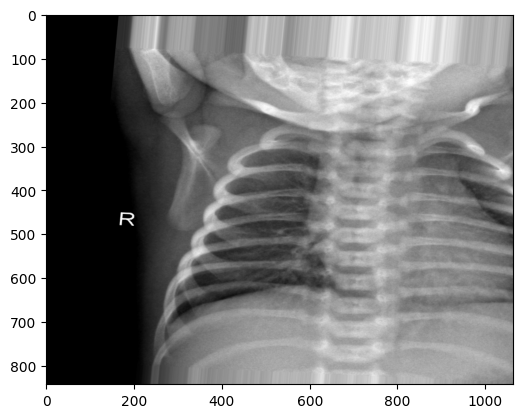

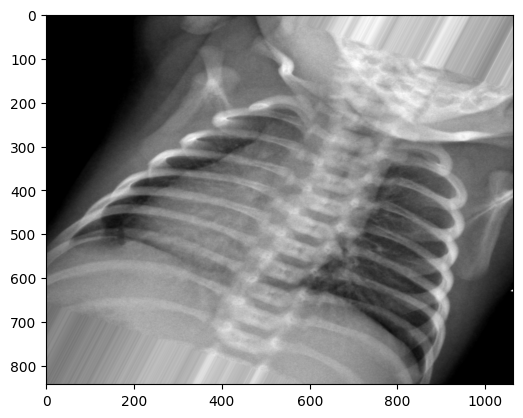

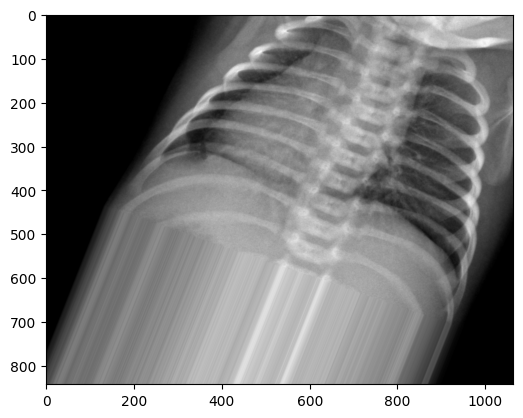

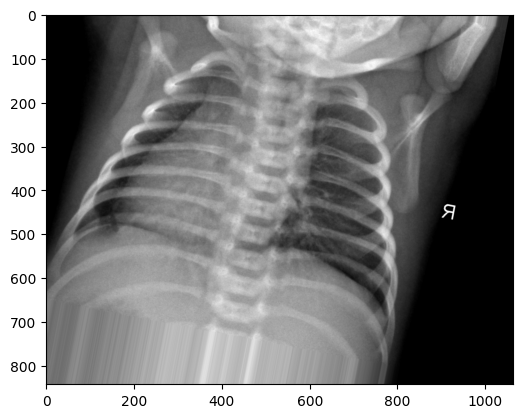

In [19]:
import keras.utils as image

fnames = [os.path.join(train_normal_dir, fname) for fname in os.listdir(train_normal_dir)]

img_path = fnames[1]

img = image.load_img(img_path)

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

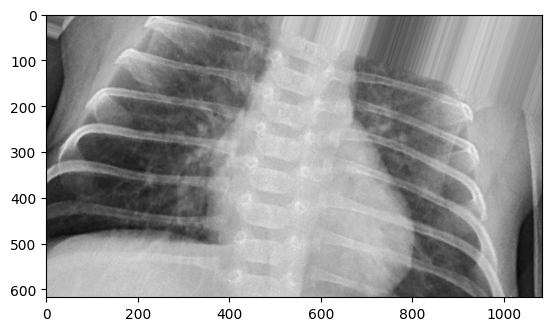

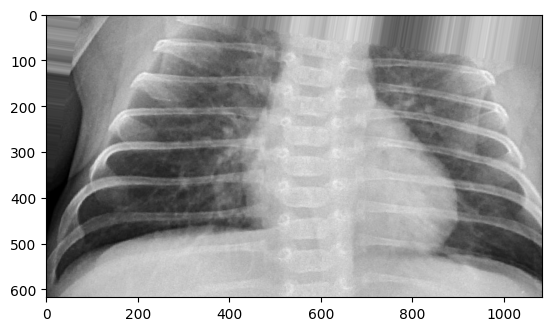

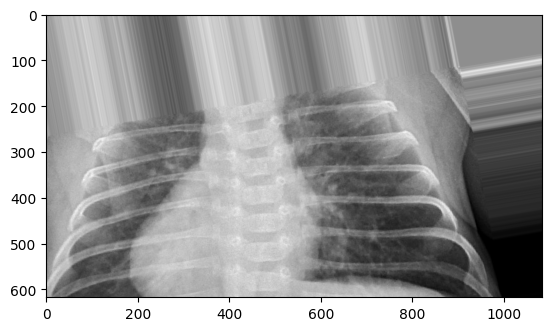

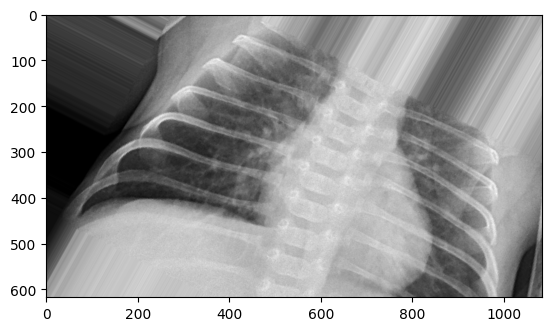

In [20]:
import keras.utils as image

fnames = [os.path.join(train_pen_dir, fname) for fname in os.listdir(train_pen_dir)]

img_path = fnames[1]

img = image.load_img(img_path)

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
train_generator = train_datagen.flow_from_directory( '/content/FinalDataset/train',
                                                    target_size=(128, 128),
                                                    batch_size=128,

                                                    class_mode='binary')

Found 3512 images belonging to 2 classes.


In [22]:
val_generator = val_datagen.flow_from_directory( '/content/FinalDataset/val',
                                                target_size=(128, 128),
                                                batch_size=128,

                                                class_mode='binary')

Found 1170 images belonging to 2 classes.


In [23]:
test_generator = test_datagen.flow_from_directory( '/content/FinalDataset/test',
                                                  target_size=(128, 128),
                                                  batch_size=1174,

                                                  class_mode='binary')

Found 1174 images belonging to 2 classes.


In [24]:
from keras.applications.efficientnet import EfficientNetB2

In [25]:
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

31790344/31790344 [==============================] - 1s 0us/step


In [26]:
'''
# Sequential Model
model = models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
'''
# Or Functional API
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
base_model.trainable = False

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 128, 128, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 128, 128, 3)          0         ['normalization[0][0]']   

In [29]:
base_model.trainable = True

In [30]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  340


In [33]:
fine_tune_at = int(len(base_model.layers)*0.7)
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False


In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 128, 128, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 128, 128, 3)          0         ['normalization[0][0]']   

In [ ]:
x_train, y_train = train_generator.next()

In [ ]:
x_val, y_val = val_generator.next()

In [36]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

In [37]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow import keras

In [38]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True,
save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

In [39]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
patience=10, min_lr=0.00001, verbose=1)

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=10,mode='min')

In [41]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(train_generator, validation_data=val_generator,
epochs=30,
batch_size=128,
callbacks=[checkpoint, reduce_lr, early_stop],class_weight=class_weights
)

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5296
Epoch 1: val_loss improved from inf to 0.79135, saving model to best_model.h5
28/28 [==============================] - 91s 2s/step - loss: 0.6847 - accuracy: 0.5296 - val_loss: 0.7914 - val_accuracy: 0.2701 - lr: 1.0000e-04
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.6510 - accuracy: 0.5638
Epoch 2: val_loss did not improve from 0.79135
28/28 [==============================] - 60s 2s/step - loss: 0.6510 - accuracy: 0.5638 - val_loss: 0.8095 - val_accuracy: 0.2701 - lr: 1.0000e-04
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.5831
Epoch 3: val_loss improved from 0.79135 to 0.79109, saving model to best_model.h5
28/28 [==============================] - 56s 2s/step - loss: 0.6363 - accuracy: 0.5831 - val_loss: 0.7911 - val_accuracy: 0.2701 - lr: 1.0000e-04
Epoch 4/30
28/28 [==============================] - ETA: 0s - loss: 0.627

In [43]:
loss, accuracy = model.evaluate(test_generator, batch_size=128)

1/1 [==============================] - 24s 24s/step - loss: 0.3084 - accuracy: 0.8799


In [44]:
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3084425628185272
Test accuracy: 0.8798977732658386


In [45]:
x_test, y_test = test_generator.next()

In [46]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)


37/37 [==============================] - 6s 67ms/step


In [47]:
auc_score = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)

In [48]:
print('Test AUC : ',auc_score)
print('Test recall: ',recall)
print('Test f1 : ',f1)
print('Test precision : ',precision)

Test AUC :  0.9338924645859048
Test recall:  0.9264018691588785
Test f1 :  0.918355529820498
Test precision :  0.9104477611940298


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

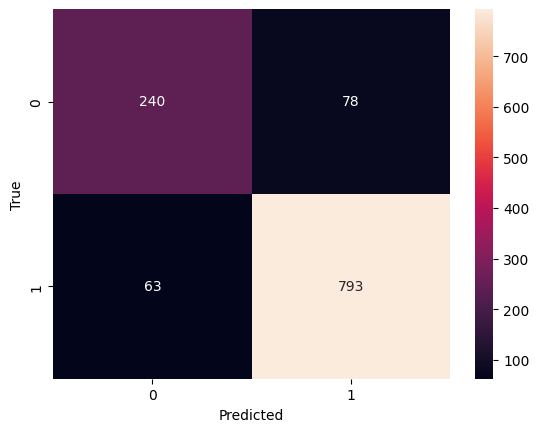

In [50]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

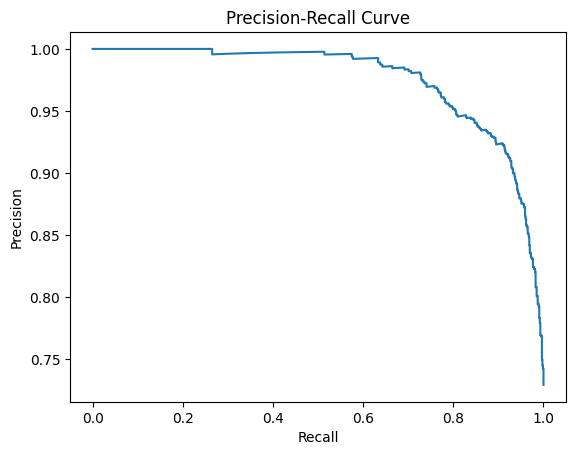

In [51]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

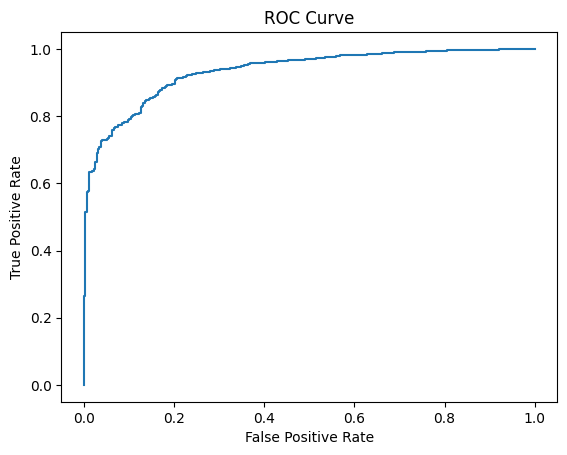

In [52]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

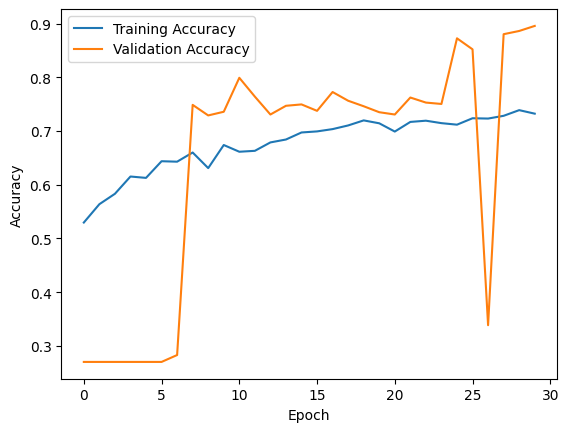

In [53]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

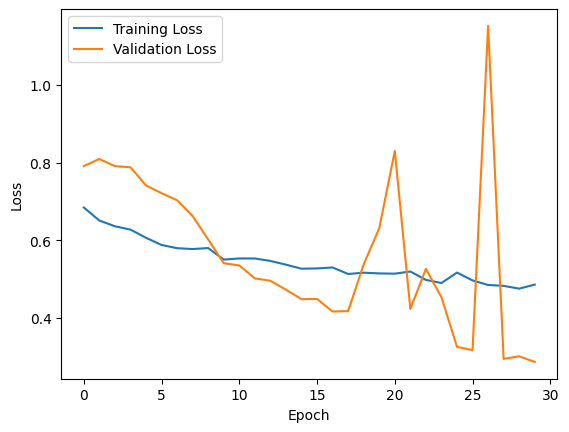

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
model.save('my_model.h5')

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
cp /content/drive/MyDrive/my_model.h5 /content

In [56]:
model = tf.keras.models.load_model('/content/best_model.h5')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x7ca6ae688430>.

In [57]:
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [58]:
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction < 0.5:
        return "Normal"
    else:
        return "Pneumonia"

In [59]:
import matplotlib.pyplot as plt
def plot_image_with_label(img_path, label):
    img = image.load_img(img_path, color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

In [60]:
img1 = '/content/N1.jpeg'
img2 = '/content/P1.jpeg'
img3 = '/content/P2.jpeg'
img4 = '/content/P3.jpeg'


1/1 [==============================] - 5s 5s/step
The X-ray image is predicted to be: Pneumonia


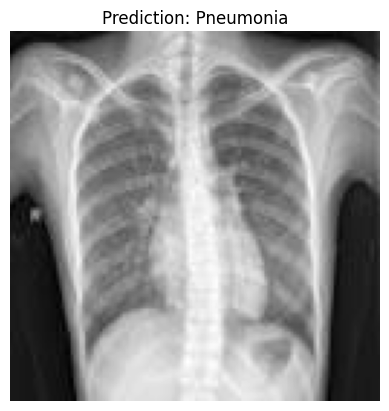

In [61]:
result = predict_image(img1)
print(f"The X-ray image is predicted to be: {result}")
plot_image_with_label(img1, f"Prediction: {result}")

1/1 [==============================] - 0s 29ms/step
The X-ray image is predicted to be: Pneumonia


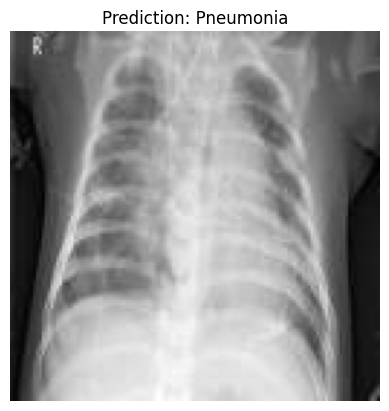

In [62]:
result = predict_image(img2)
print(f"The X-ray image is predicted to be: {result}")
plot_image_with_label(img2, f"Prediction: {result}")

1/1 [==============================] - 0s 29ms/step
The X-ray image is predicted to be: Pneumonia


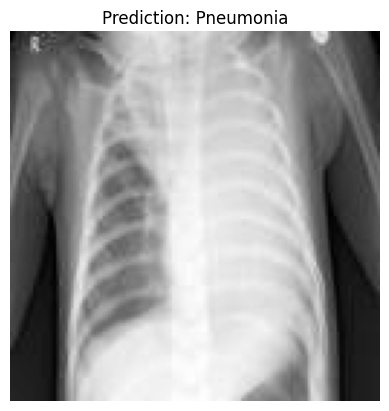

In [63]:
result = predict_image(img3)
print(f"The X-ray image is predicted to be: {result}")
plot_image_with_label(img3, f"Prediction: {result}")

1/1 [==============================] - 0s 29ms/step
The X-ray image is predicted to be: Pneumonia


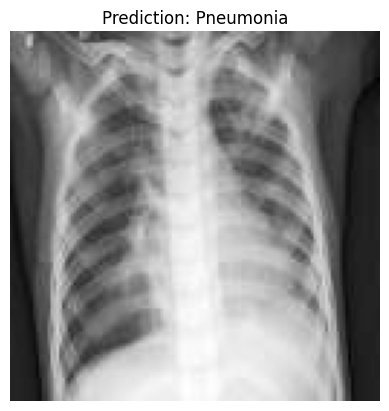

In [64]:
result = predict_image(img4)
print(f"The X-ray image is predicted to be: {result}")
plot_image_with_label(img4, f"Prediction: {result}")